In [25]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus= False)

In [26]:
#학생별 평균점수
enroll = pd.read_csv('data/수강.csv')
group = enroll.groupby('학생번호')['점수'].mean().to_frame()
group

,점수
학생번호,
92414029,81.250000
92414033,82.500000
92454018,90.000000
92514009,77.500000
92514023,70.000000
95414058,83.333333
95454003,81.000000
96414404,75.000000


In [27]:
stu = pd.read_csv('data/학생.csv')
merge = stu.merge(group, how = 'left', on= '학생번호')
merge

,학생번호,학생이름,학생학과,학년,생년월일,지도교수,점수
0,92414029,서연우,전산,3,73/10/06,228,81.250000
1,92414033,김창덕,전산,4,73/10/26,221,82.500000
2,92514009,이지행,전자,4,73/11/16,311,77.500000
3,92514023,김형명,전자,4,73/08/29,311,70.000000
4,92454018,이원구,건축,3,74/09/30,509,90.000000
5,95454003,이재영,건축,4,76/02/06,509,81.000000
6,95414058,박혜경,전산,4,76/03/12,221,83.333333
7,96414404,김수정,전산,3,77/12/22,228,75.000000


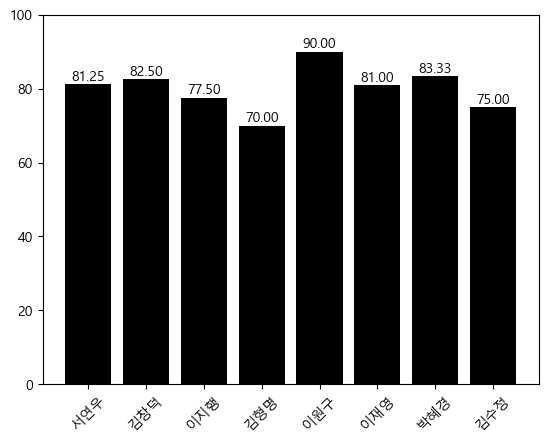

In [28]:
plt.bar(merge['학생이름'], merge['점수'], color = 'black')
plt.ylim(0,100)
plt.xticks(merge['학생이름'], rotation=45)
for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grade+1, f'{grade:.2f}', ha='center')

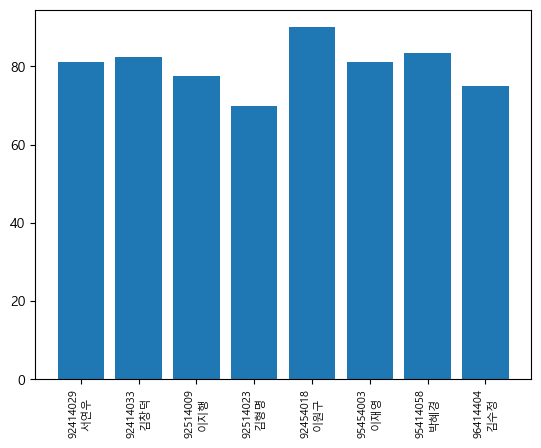

In [29]:
nos = merge['학생번호']
names = merge['학생이름']
grades = merge['점수']
xticks = [f'{nos[idx]}\n{names[idx]}' for idx, x in enumerate(nos)]
plt.bar(names, grades)
plt.xticks(names, xticks, rotation=90, size=8)
plt.show()

In [30]:
group = enroll.groupby('강좌번호')['점수'].mean().to_frame()
cou = pd.read_csv('data/강좌.csv')
merge = cou.merge(group, how='left', on='강좌번호')
merge.fillna({'점수':0}, inplace=True)

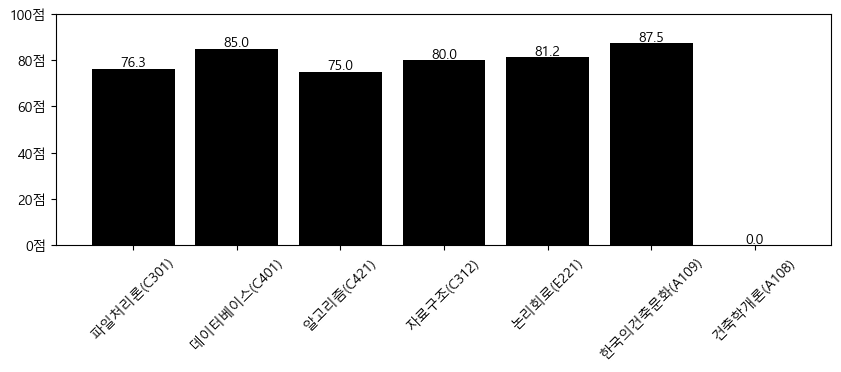

In [33]:
nos = merge['강좌번호']
names = merge['강좌이름']
grades = merge['점수']
plt.figure(figsize=(10, 3))
plt.bar(names, grades, color = 'black')

xticks = [f'{names[idx]}({nos[idx]})' for idx in range(len(nos))]
plt.xticks(names, xticks, rotation=45)

yticks = [y for y in range(0, 101, 20)]
plt.yticks(yticks, [f'{y}점' for y in yticks])

plt.ylim(0, 100)
for idx in range(len(nos)):
    plt.text(idx, grades[idx]+1, f'{grades[idx]:.1f}', ha='center')
plt.show()


In [ ]:
group = enroll.groupby('강좌번호')['점수'].mean()
group

강좌번호
A109    87.500000
C301    76.333333
C312    80.000000
C401    85.000000
C421    75.000000
E221    81.250000
Name: 점수, dtype: float64